In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from geopandas.tools import sjoin
from shapely.geometry import Point, mapping,shape

In [2]:
#Importing the median household income dataframe
mhincome = pd.read_csv('2014 Median Household Income.csv', skiprows=[0])

In [3]:
mhincome.columns

Index([u'Id', u'Id2', u'Geography', u'Total; Estimate; Households',
       u'Total; Margin of Error; Households',
       u'Median income (dollars); Estimate; Households',
       u'Median income (dollars); Margin of Error; Households',
       u'Total; Estimate; Households - One race-- - White',
       u'Total; Margin of Error; Households - One race-- - White',
       u'Median income (dollars); Estimate; Households - One race-- - White',
       ...
       u'Median income (dollars); Estimate; PERCENT IMPUTED - Household income in the past 12 months',
       u'Median income (dollars); Margin of Error; PERCENT IMPUTED - Household income in the past 12 months',
       u'Total; Estimate; PERCENT IMPUTED - Family income in the past 12 months',
       u'Total; Margin of Error; PERCENT IMPUTED - Family income in the past 12 months',
       u'Median income (dollars); Estimate; PERCENT IMPUTED - Family income in the past 12 months',
       u'Median income (dollars); Margin of Error; PERCENT IMPUTE

In [4]:
len(mhincome)

2167

In [5]:
mhincome = mhincome[['Id2','Total; Estimate; Households', 'Median income (dollars); Estimate; Households']]

In [6]:
mhincome.columns = [['BoroCT2010', 'Total Households', 'Median Income']]

In [7]:
#The next lines (bewteen 7 and 17) are used for procesing the census ttacys numbers
#to match the shapefile numbers from NYCBytes
mhincome['BoroCT2010'] = mhincome['BoroCT2010'].map(lambda x: str(x)[3:])

In [8]:
mhincome['Borocode'] = mhincome['BoroCT2010'].str[:2]

In [9]:
mhincome['Median Income'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [10]:
mhincome['Median Income'] = mhincome['Median Income'].replace('', 'NaN')

In [11]:
mhincome['Median Income'] = mhincome['Median Income'].astype(float)

In [12]:
mhincome['Total Households'] = mhincome['Total Households'].astype(float)

In [13]:
bcorr = {'05': '2', '47': '3', '61' : '1', '81': '4', '85' : '5'}

In [14]:
mhincome['Borocode2'] = mhincome['Borocode'].map(bcorr)

In [15]:
mhincome['BoroCT2010'] = mhincome['BoroCT2010'].map(lambda x: str(x)[2:])

In [16]:
mhincome['BoroCT2010'] = mhincome.Borocode2 + mhincome.BoroCT2010.astype(str)

In [17]:
mhincome = mhincome[['BoroCT2010', 'Total Households', 'Median Income']]

In [18]:
mhincome.tail()

,BoroCT2010,Total Households,Median Income
2162,5030302,1938.0,80887.0
2163,5031901,1086.0,27031.0
2164,5031902,1619.0,31750.0
2165,5032300,464.0,58804.0
2166,5990100,0.0,NaN


In [19]:
#Importing the car ownership data
carowner = pd.read_csv('2014 Car Ownership.csv', skiprows=[0])

In [20]:
carowner.columns

Index([u'Id', u'Id2', u'Geography',
       u'Estimate; Aggregate number of vehicles available:',
       u'Margin of Error; Aggregate number of vehicles available:',
       u'Estimate; Aggregate number of vehicles available: - Owner occupied',
       u'Margin of Error; Aggregate number of vehicles available: - Owner occupied',
       u'Estimate; Aggregate number of vehicles available: - Renter occupied',
       u'Margin of Error; Aggregate number of vehicles available: - Renter occupied'],
      dtype='object')

In [21]:
carowner = carowner[['Id2','Estimate; Aggregate number of vehicles available:']]

In [22]:
carowner.columns = [['BoroCT2010', 'Total cars']]

In [23]:
# Same procedure to match the census tracts numbers from census to the NYCbytes
#numbers
carowner['BoroCT2010'] = carowner['BoroCT2010'].map(lambda x: str(x)[3:])

In [24]:
carowner['Borocode'] = carowner['BoroCT2010'].str[:2]

In [25]:
carowner.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [26]:
carowner = carowner.replace('', 'NaN')

In [27]:
carowner['Borocode2'] = carowner['Borocode'].map(bcorr)

In [28]:
carowner.head()

,BoroCT2010,Total cars,Borocode,Borocode2
0,05000100,NaN,05,2
1,05000200,1709,05,2
2,05000400,1872,05,2
3,05001600,1294,05,2
4,05001900,354,05,2


In [29]:
carowner['BoroCT2010'] = carowner['BoroCT2010'].map(lambda x: str(x)[2:])

In [30]:
carowner['BoroCT2010'] = carowner.Borocode2.astype(str) + carowner.BoroCT2010.astype(str)

In [31]:
carowner = carowner[['BoroCT2010', 'Total cars']]

In [32]:
len(carowner)

2083

In [33]:
carowner['Total cars'] = carowner['Total cars'].astype(float)

In [34]:
carowner.tail()

,BoroCT2010,Total cars
2078,5030302,2860.0
2079,5031901,691.0
2080,5031902,1396.0
2081,5032300,578.0
2082,5990100,NaN


In [35]:
#Importing education level data
education = pd.read_csv('2014 Education level.csv', skiprows=[0])

In [36]:
education.columns

Index([u'Id', u'Id2', u'Geography', u'Estimate; Total:',
       u'Margin of Error; Total:',
       u'Estimate; Total: - No schooling completed',
       u'Margin of Error; Total: - No schooling completed',
       u'Estimate; Total: - Nursery school',
       u'Margin of Error; Total: - Nursery school',
       u'Estimate; Total: - Kindergarten',
       u'Margin of Error; Total: - Kindergarten',
       u'Estimate; Total: - 1st grade', u'Margin of Error; Total: - 1st grade',
       u'Estimate; Total: - 2nd grade', u'Margin of Error; Total: - 2nd grade',
       u'Estimate; Total: - 3rd grade', u'Margin of Error; Total: - 3rd grade',
       u'Estimate; Total: - 4th grade', u'Margin of Error; Total: - 4th grade',
       u'Estimate; Total: - 5th grade', u'Margin of Error; Total: - 5th grade',
       u'Estimate; Total: - 6th grade', u'Margin of Error; Total: - 6th grade',
       u'Estimate; Total: - 7th grade', u'Margin of Error; Total: - 7th grade',
       u'Estimate; Total: - 8th grade', u'Mar

In [37]:
education = education[[1, 3, 35, 45, 47, 51]]

In [38]:
education.columns = [['BoroCT2010', 'Total educated', 'Total High School', 'Total bachelors', "Total masters", 'Total PHD']]

In [39]:
len(education)

2167

In [40]:
education.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [41]:
education = education.replace('', 'NaN')

In [42]:
education = education.astype(float)

In [43]:
education['BoroCT2010'] = mhincome['BoroCT2010']

In [44]:
education.tail()

,BoroCT2010,Total educated,Total High School,Total bachelors,Total masters,Total PHD
2162,5030302,4038.0,1065.0,746.0,393.0,74.0
2163,5031901,1709.0,395.0,240.0,24.0,0.0
2164,5031902,2664.0,835.0,435.0,129.0,0.0
2165,5032300,826.0,195.0,111.0,19.0,0.0
2166,5990100,0.0,0.0,0.0,0.0,0.0


In [45]:
#Import median age dataframe
age = pd.read_csv('2014 estimated age.csv', skiprows=[0])
age.columns

Index([u'Id', u'Id2', u'Geography', u'Total; Estimate; Total population',
       u'Total; Margin of Error; Total population',
       u'Male; Estimate; Total population',
       u'Male; Margin of Error; Total population',
       u'Female; Estimate; Total population',
       u'Female; Margin of Error; Total population',
       u'Total; Estimate; AGE - Under 5 years',
       ...
       u'Male; Estimate; PERCENT IMPUTED - Sex',
       u'Male; Margin of Error; PERCENT IMPUTED - Sex',
       u'Female; Estimate; PERCENT IMPUTED - Sex',
       u'Female; Margin of Error; PERCENT IMPUTED - Sex',
       u'Total; Estimate; PERCENT IMPUTED - Age',
       u'Total; Margin of Error; PERCENT IMPUTED - Age',
       u'Male; Estimate; PERCENT IMPUTED - Age',
       u'Male; Margin of Error; PERCENT IMPUTED - Age',
       u'Female; Estimate; PERCENT IMPUTED - Age',
       u'Female; Margin of Error; PERCENT IMPUTED - Age'],
      dtype='object', length=219)

In [46]:
age = age[['Id2', 'Total; Estimate; SUMMARY INDICATORS - Median age (years)']]

In [47]:
age.columns = [['BoroCT2010', 'Median Age']]

In [48]:
len(age)

2167

In [49]:
age.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [50]:
age = age.replace('', 'NaN')

In [51]:
age = age.astype(float)/10

In [52]:
age['BoroCT2010'] = mhincome['BoroCT2010']

In [53]:
age.tail()

,BoroCT2010,Median Age
2162,5030302,36.5
2163,5031901,30.8
2164,5031902,30.6
2165,5032300,42.0
2166,5990100,NaN


In [54]:
#Import type of household (family or non-family) 
housetype = pd.read_csv('2014 Household Type.csv', skiprows=[0])
housetype.columns

Index([u'Id', u'Id2', u'Geography', u'Estimate; Total:',
       u'Margin of Error; Total:', u'Estimate; Family households:',
       u'Margin of Error; Family households:',
       u'Estimate; Family households: - 2-person household',
       u'Margin of Error; Family households: - 2-person household',
       u'Estimate; Family households: - 3-person household',
       u'Margin of Error; Family households: - 3-person household',
       u'Estimate; Family households: - 4-person household',
       u'Margin of Error; Family households: - 4-person household',
       u'Estimate; Family households: - 5-person household',
       u'Margin of Error; Family households: - 5-person household',
       u'Estimate; Family households: - 6-person household',
       u'Margin of Error; Family households: - 6-person household',
       u'Estimate; Family households: - 7-or-more person household',
       u'Margin of Error; Family households: - 7-or-more person household',
       u'Estimate; Nonfamily household

In [55]:
housetype = housetype[['Id2', 'Estimate; Total:', 'Estimate; Family households:', 'Estimate; Nonfamily households:']]

In [56]:
housetype.columns = ['BoroCT2010', 'Total households' , 'Total family households', 'Total non-family households']

In [57]:
len(housetype)

2167

In [58]:
housetype.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [59]:
housetype = housetype.replace('', 'NaN')

In [60]:
housetype = housetype.astype(float)

In [61]:
housetype['BoroCT2010'] = mhincome['BoroCT2010']

In [62]:
housetype.tail()

,BoroCT2010,Total households,Total family households,Total non-family households
2162,5030302,1938.0,1622.0,316.0
2163,5031901,1086.0,837.0,249.0
2164,5031902,1619.0,1171.0,448.0
2165,5032300,464.0,335.0,129.0
2166,5990100,0.0,0.0,0.0


In [63]:
housevalue = pd.read_csv('2014 Median House Value.csv', skiprows=[0])
housevalue.columns

Index([u'Id', u'Id2', u'Geography', u'Estimate; Median value (dollars)',
       u'Margin of Error; Median value (dollars)'],
      dtype='object')

In [64]:
housevalue = housevalue[['Id2', 'Estimate; Median value (dollars)']]

In [65]:
housevalue.columns = ['BoroCT2010', 'Median House Value']

In [66]:
len(housevalue)

2167

In [67]:
housevalue.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [68]:
housevalue = housevalue.replace('', 'NaN')

In [69]:
housevalue = housevalue.astype(float)

In [70]:
housevalue['BoroCT2010'] = mhincome['BoroCT2010']

In [71]:
housevalue.tail()

,BoroCT2010,Median House Value
2162,5030302,321700.0
2163,5031901,344600.0
2164,5031902,312700.0
2165,5032300,186600.0
2166,5990100,NaN


In [72]:
#Importing type of resident data (owner vs renter)
ownorrent = pd.read_csv('2014 Owner and renter units.csv', skiprows=[0])
ownorrent.columns

Index([u'Id', u'Id2', u'Geography', u'Estimate; Total:',
       u'Margin of Error; Total:', u'Estimate; Total: - Owner occupied',
       u'Margin of Error; Total: - Owner occupied',
       u'Estimate; Total: - Renter occupied',
       u'Margin of Error; Total: - Renter occupied'],
      dtype='object')

In [73]:
ownorrent = ownorrent[['Id2', 'Estimate; Total:', 'Estimate; Total: - Owner occupied', 'Estimate; Total: - Renter occupied' ]]

In [74]:
ownorrent.columns = ['BoroCT2010', 'Total Hunits' , 'Owner Occupied' , 'Renter Occupied']

In [75]:
len(ownorrent)

2167

In [76]:
ownorrent.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [77]:
ownorrent = ownorrent.replace('', 'NaN')

In [78]:
ownorrent = ownorrent.astype(float)

In [79]:
ownorrent['BoroCT2010'] = mhincome['BoroCT2010']

In [80]:
ownorrent.tail()

,BoroCT2010,Total Hunits,Owner Occupied,Renter Occupied
2162,5030302,6205.0,4159.0,2046.0
2163,5031901,2916.0,592.0,2324.0
2164,5031902,4514.0,2359.0,2155.0
2165,5032300,1106.0,853.0,253.0
2166,5990100,0.0,0.0,0.0


In [81]:
#Import population data
population = pd.read_csv('2014 population.csv', skiprows=[0])
population.columns

Index([u'Id', u'Id2', u'Geography', u'Estimate; Total',
       u'Margin of Error; Total'],
      dtype='object')

In [82]:
population = population[['Id2', 'Estimate; Total']]

In [83]:
population.columns = ['BoroCT2010', 'Total Population']

In [84]:
population.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [85]:
population = population.replace('', 'NaN')

In [86]:
population = population.astype(float)

In [87]:
population['BoroCT2010'] = mhincome['BoroCT2010']

In [88]:
population.tail()

,BoroCT2010,Total Population
2162,5030302,6205.0
2163,5031901,2916.0
2164,5031902,4535.0
2165,5032300,1106.0
2166,5990100,0.0


In [96]:
#Import race data
race = pd.read_csv('2014 Race and sex.csv', skiprows=[1])
race.columns

Index([u'GEO.id', u'GEO.id2', u'GEO.display-label', u'HC01_VC03', u'HC02_VC03',
       u'HC03_VC03', u'HC04_VC03', u'HC01_VC04', u'HC02_VC04', u'HC03_VC04',
       ...
       u'HC03_VC101', u'HC04_VC101', u'HC01_VC102', u'HC02_VC102',
       u'HC03_VC102', u'HC04_VC102', u'HC01_VC104', u'HC02_VC104',
       u'HC03_VC104', u'HC04_VC104'],
      dtype='object', length=327)

In [97]:
race = race[['GEO.id2', 'HC03_VC87', 'HC01_VC94', 'HC01_VC95', 'HC01_VC97', 'HC01_VC88']]

In [98]:
race.columns = ['BoroCT2010', 'Total Population', 'White only', 'Black only', 'Asian only', 'Hispanic only']

In [99]:
race.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [100]:
race = race.replace('', 'NaN')

In [101]:
race = race.astype(float)

In [102]:
len(race)

2167

In [103]:
race['BoroCT2010'] = mhincome['BoroCT2010']

In [106]:
race['Other Only'] = race['Total Population'] - race['White only'] - race['Black only'] - race['Asian only'] - race['Hispanic only']

In [107]:
del(race['Total Population'])

In [108]:
race.tail()

,BoroCT2010,White only,Black only,Asian only,Hispanic only,Other Only
2162,5030302,1480.0,1373.0,889.0,2293.0,170.0
2163,5031901,132.0,1743.0,140.0,888.0,13.0
2164,5031902,654.0,2900.0,16.0,920.0,45.0
2165,5032300,345.0,247.0,0.0,508.0,6.0
2166,5990100,0.0,0.0,0.0,0.0,0.0


In [109]:
#Import median rent data
mrent = pd.read_csv('2014 Median rent.csv', skiprows=[1])
mrent.columns

Index([u'GEO.id', u'GEO.id2', u'GEO.display-label', u'HC01_VC03', u'HC02_VC03',
       u'HC03_VC03', u'HC04_VC03', u'HC01_VC04', u'HC02_VC04', u'HC03_VC04',
       ...
       u'HC03_VC201', u'HC04_VC201', u'HC01_VC202', u'HC02_VC202',
       u'HC03_VC202', u'HC04_VC202', u'HC01_VC205', u'HC02_VC205',
       u'HC03_VC205', u'HC04_VC205'],
      dtype='object', length=567)

In [110]:
mrent = mrent[['GEO.id2', 'HC01_VC189']]

In [111]:
mrent.columns = ['BoroCT2010', 'Median Rent']

In [112]:
mrent.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [113]:
mrent = mrent.replace('', 'NaN')

In [114]:
mrent = mrent.astype(float)

In [115]:
len(mrent)

2167

In [116]:
mrent['BoroCT2010'] = mhincome['BoroCT2010']

In [117]:
mrent.tail()

,BoroCT2010,Median Rent
2162,5030302,1650.0
2163,5031901,603.0
2164,5031902,754.0
2165,5032300,1281.0
2166,5990100,NaN


In [118]:
#Importing 311 total call by Census Tracts
tcomplaints = pd.read_csv('2014 total complaints by CT.csv')
tcomplaints.columns = ['BoroCT2010', '311 calls']
tcomplaints.BoroCT2010 = tcomplaints.BoroCT2010.astype(str)

In [119]:
#The next lones (100 to 108) are created to merge all the demographic data sets
#with the 311 call data
merged = pd.merge(tcomplaints, mhincome, on='BoroCT2010')

In [120]:
merged = pd.merge(merged, carowner, on='BoroCT2010')

In [121]:
merged = pd.merge(merged, education, on='BoroCT2010')

In [122]:
merged = pd.merge(merged, age , on='BoroCT2010')

In [123]:
merged = pd.merge(merged, housetype, on='BoroCT2010')

In [124]:
merged = pd.merge(merged, housevalue, on='BoroCT2010')

In [125]:
merged = pd.merge(merged, ownorrent, on='BoroCT2010')

In [126]:
merged = pd.merge(merged, population, on='BoroCT2010')

In [127]:
merged = pd.merge(merged, race, on='BoroCT2010')

In [128]:
merged = pd.merge(merged, mrent, on='BoroCT2010')

In [129]:
merged.head()

,BoroCT2010,311 calls,Total Households,Median Income,Total cars,Total educated,Total High School,Total bachelors,Total masters,Total PHD,...,Total Hunits,Owner Occupied,Renter Occupied,Total Population,White only,Black only,Asian only,Hispanic only,Other Only,Median Rent
0,1000202,580,3447.0,29418.0,744.0,6073.0,1481.0,959.0,326.0,30.0,...,8084.0,1701.0,6383.0,8308.0,2050.0,753.0,2044.0,3168.0,293.0,621.0
1,1000500,8,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1000600,1151,3954.0,18944.0,768.0,8360.0,1177.0,965.0,238.0,23.0,...,11149.0,332.0,10817.0,11354.0,521.0,983.0,6189.0,3500.0,161.0,589.0
3,1000700,1633,4610.0,114519.0,581.0,6758.0,103.0,3175.0,1714.0,277.0,...,8582.0,1730.0,6852.0,8598.0,5894.0,284.0,1683.0,574.0,163.0,2000.0
4,1000800,1105,3585.0,24366.0,685.0,7346.0,1165.0,861.0,330.0,59.0,...,9319.0,159.0,9160.0,9333.0,727.0,88.0,7814.0,262.0,442.0,906.0


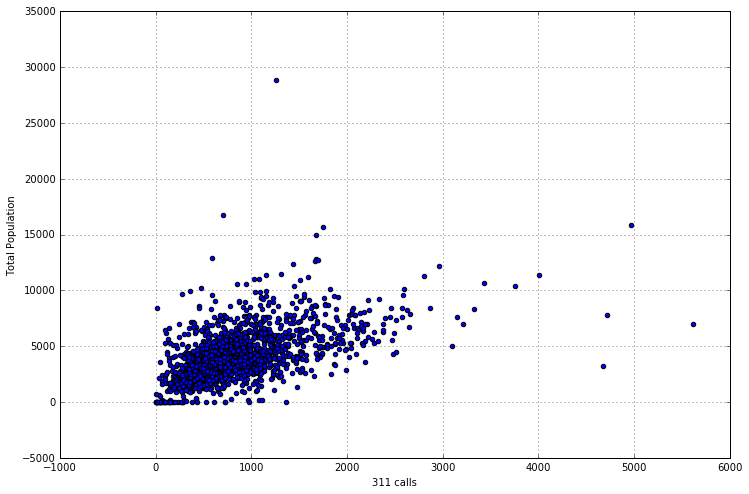

In [130]:
merged.plot(x='311 calls', y='Total Population', kind='scatter', grid=True, figsize=(12,8))

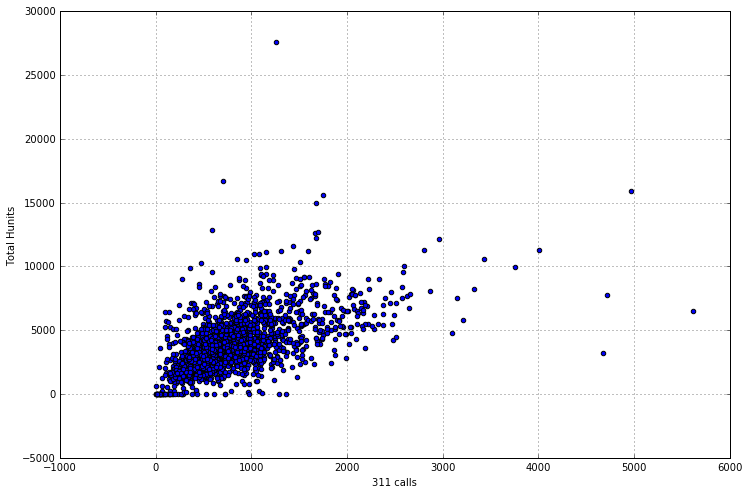

In [131]:
merged.plot(x='311 calls', y='Total Hunits', kind='scatter', grid=True, figsize=(12,8))

In [132]:
#Number of normalized 311 calls (total calls by census tracts / total population by census tracts)
merged['Normalized 311 calls'] = merged['311 calls']/merged['Total Population']

In [133]:
NNcorr = merged.corr(method='pearson', min_periods=1)

In [134]:
NNcorr.iloc[21]

311 calls                      0.483075
Total Households               0.387775
Median Income                 -0.389183
Total cars                     0.025757
Total educated                 0.481044
Total High School              0.491076
Total bachelors                0.047352
Total masters                 -0.031236
Total PHD                     -0.035201
Median Age                    -0.301706
Total households               0.387775
Total family households        0.538924
Total non-family households    0.187065
Median House Value            -0.297204
Total Hunits                   0.587977
Owner Occupied                -0.121759
Renter Occupied                0.710683
Total Population               0.587995
White only                    -0.151203
Black only                     0.139863
Asian only                     0.038928
Hispanic only                  1.000000
Other Only                     0.099419
Median Rent                   -0.308702
Normalized 311 calls          -0.025120


In [135]:
NNcorr.iloc[0]

311 calls                      1.000000
Total Households               0.555155
Median Income                 -0.093044
Total cars                     0.105361
Total educated                 0.564145
Total High School              0.366435
Total bachelors                0.387903
Total masters                  0.299839
Total PHD                      0.182829
Median Age                    -0.181184
Total households               0.555155
Total family households        0.501749
Total non-family households    0.477760
Median House Value             0.024578
Total Hunits                   0.587996
Owner Occupied                 0.035780
Renter Occupied                0.621041
Total Population               0.589112
White only                     0.193078
Black only                     0.242965
Asian only                     0.038816
Hispanic only                  0.483075
Other Only                     0.184431
Median Rent                   -0.012231
Normalized 311 calls           0.027682


In [136]:
#merged.to_csv('Demographic and 311 calls merged - without normalization.csv')

In [137]:
#The next lines are going to be used to define the normalization of the demographic
#variables by the factor we decided

#Number of normalized 311 calls (total calls by census tracts / total population by census tracts)
merged['Normalized 311 calls'] = merged['311 calls']/merged['Total Population']

In [138]:
#Number of normalized cars in each area (total cars by census tracts / total population by census tracts)
merged['Normalized cars'] = merged['Total cars']/merged['Total households']

In [139]:
#Number of normalized educated people by level of education in each area by 1000 people
#(total educated people by level of education by census tracts / total population by census tracts)
# multiplied by 1000
merged['Normalized High school'] = merged['Total High School']/merged['Total Population']*1000
merged['Normalized bachelors'] = merged['Total bachelors']/merged['Total Population']*1000
merged['Normalized masters'] = merged['Total masters']/merged['Total Population']*1000
merged['Normalized PHD'] = merged['Total PHD']/merged['Total Population']*1000

In [140]:
#Number of normalized type of households in each area (total type of household by census tracts / 
#total number of households by census tracts)
merged['Normalized familiy household'] = merged['Total family households']/merged['Total households']
merged['Normalized non-family household'] = merged['Total non-family households']/merged['Total households']

In [141]:
#Number of normalized type of house units in each area (total type of house units by census tracts / 
#total number of house units by census tracts)
merged['Normalized owner ocuppied'] = merged['Owner Occupied']/merged['Total Hunits']
merged['Normalized renter ocuppied'] = merged['Renter Occupied']/merged['Total Hunits']

In [145]:
#Race normalization based on total population
merged['Normalized white only'] = merged['White only']/merged['Total Population']
merged['Normalized black only'] = merged['Black only']/merged['Total Population']
merged['Normalized asian only'] = merged['Asian only']/merged['Total Population']
merged['Normalized hispanic only'] = merged['Hispanic only']/merged['Total Population']
merged['Normalized other only'] = merged['Other Only']/merged['Total Population']

In [146]:
merged.columns

Index([u'BoroCT2010', u'311 calls', u'Total Households', u'Median Income',
       u'Total cars', u'Total educated', u'Total High School',
       u'Total bachelors', u'Total masters', u'Total PHD', u'Median Age',
       u'Total households', u'Total family households',
       u'Total non-family households', u'Median House Value', u'Total Hunits',
       u'Owner Occupied', u'Renter Occupied', u'Total Population',
       u'White only', u'Black only', u'Asian only', u'Hispanic only',
       u'Other Only', u'Median Rent', u'Normalized 311 calls',
       u'Normalized cars', u'Normalized High school', u'Normalized bachelors',
       u'Normalized masters', u'Normalized PHD',
       u'Normalized familiy household', u'Normalized non-family household',
       u'Normalized owner ocuppied', u'Normalized renter ocuppied',
       u'Normalized white only', u'Normalized black only',
       u'Normalized asian only', u'Normalized hispanic only',
       u'Normalized other only'],
      dtype='object')

In [147]:
merged.to_csv('Demographic and 311 calls merged - Census tract level - all features.csv')

In [148]:
merged = merged[['Normalized 311 calls', 'Median House Value', 'Median Age', 'Median Rent', 
                         'Median Income', 'Normalized cars', 'Normalized High school', 
                         'Normalized bachelors', 'Normalized masters', 'Normalized PHD', 'Normalized familiy household',
                         'Normalized non-family household', 'Normalized owner ocuppied', 'Normalized renter ocuppied',
                         'Total Population', 'Total households', 'Normalized white only', 'Normalized black only', 
                         'Normalized asian only', 'Normalized hispanic only', 'Normalized other only']]

In [149]:
merged.columns

Index([u'Normalized 311 calls', u'Median House Value', u'Median Age',
       u'Median Rent', u'Median Income', u'Normalized cars',
       u'Normalized High school', u'Normalized bachelors',
       u'Normalized masters', u'Normalized PHD',
       u'Normalized familiy household', u'Normalized non-family household',
       u'Normalized owner ocuppied', u'Normalized renter ocuppied',
       u'Total Population', u'Total households', u'Normalized white only',
       u'Normalized black only', u'Normalized asian only',
       u'Normalized hispanic only', u'Normalized other only'],
      dtype='object')

In [150]:
merged.tail()

,Normalized 311 calls,Median House Value,Median Age,Median Rent,Median Income,Normalized cars,Normalized High school,Normalized bachelors,Normalized masters,Normalized PHD,...,Normalized non-family household,Normalized owner ocuppied,Normalized renter ocuppied,Total Population,Total households,Normalized white only,Normalized black only,Normalized asian only,Normalized hispanic only,Normalized other only
2073,0.145426,351700.0,32.2,1294.0,59625.0,1.278022,194.427979,89.903181,50.780478,3.951788,...,0.317582,0.574367,0.425633,5061.0,1820.0,0.472831,0.107686,0.129619,0.274847,0.015017
2074,0.138437,321700.0,36.5,1650.0,80887.0,1.475748,171.635778,120.225624,63.336019,11.925866,...,0.163055,0.670266,0.329734,6205.0,1938.0,0.238517,0.221273,0.143272,0.369541,0.027397
2075,0.120027,344600.0,30.8,603.0,27031.0,0.636280,135.459534,82.304527,8.230453,0.000000,...,0.229282,0.203018,0.796982,2916.0,1086.0,0.045267,0.597737,0.048011,0.304527,0.004458
2076,0.248291,312700.0,30.6,754.0,31750.0,0.862261,184.123484,95.920617,28.445424,0.000000,...,0.276714,0.522596,0.477404,4535.0,1619.0,0.144212,0.639471,0.003528,0.202867,0.009923
2077,0.289331,186600.0,42.0,1281.0,58804.0,1.245690,176.311031,100.361664,17.179024,0.000000,...,0.278017,0.771248,0.228752,1106.0,464.0,0.311935,0.223327,0.000000,0.459313,0.005425


In [151]:
Normcorr = merged.corr(method='pearson', min_periods=1)

In [152]:
Normcorr.iloc[0]

Normalized 311 calls               1.000000
Median House Value                 0.039808
Median Age                        -0.006998
Median Rent                        0.015241
Median Income                      0.015507
Normalized cars                   -0.074097
Normalized High school             0.035083
Normalized bachelors              -0.032696
Normalized masters                -0.020984
Normalized PHD                    -0.015622
Normalized familiy household      -0.110036
Normalized non-family household    0.110036
Normalized owner ocuppied         -0.082388
Normalized renter ocuppied         0.082388
Total Population                  -0.057227
Total households                  -0.046488
Normalized white only             -0.022699
Normalized black only              0.006801
Normalized asian only             -0.024157
Normalized hispanic only           0.018103
Normalized other only              0.115431
Name: Normalized 311 calls, dtype: float64

In [ ]:
#merged.to_csv('Demographic and 311 calls merged - 2.csv')